In [2]:
import numpy as np # Álgebra Lineal
import pandas as pd # Manejo de datos
import matplotlib.pyplot as plt # Gráficos
import seaborn as sns # Gráficos estadísticos
import plotly.express as pe # Gráficos interactivos

from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler # Preprocesamiento de datos
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # Métricas de evaluación
from sklearn.datasets import fetch_california_housing # Datos
from sklearn.linear_model import LinearRegression # Regresión lineal
from sklearn.ensemble import RandomForestRegressor # Regresión con bosques aleatorios
from sklearn.tree import DecisionTreeRegressor # Regresión con árboles de decisión
from sklearn.neural_network import MLPRegressor # Regresión con redes neuronales
from sklearn.svm import SVR # Regresión con máquinas de soporte vectorial
from xgboost import XGBRegressor # Regresión con XGBoost

# Filtrar los avisos de sklearn
import warnings
warnings.filterwarnings("ignore")

# Estilo de los gráficos
plt.style.use("ggplot")

In [3]:
# Instanciamos los datos
data = fetch_california_housing(as_frame=True)

# Cargamos los datos como df
df = pd.concat([data.data, data.target], axis=1)

# Primera vista de los datos
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Estructura del dataset
def estructura_datos(dataframe):
    print(f"Cantidad de filas: {dataframe.shape[0]}")
    print(f"Cantidad de columnas: {dataframe.shape[1]}")
    print(f"Cantidad de datos: {dataframe.size}")
    print(f"Cantidad de valores duplicados: {dataframe.duplicated().sum()}")
    print(f"Cantidad de valores nulos: {dataframe.isnull().sum().sum()}")
    print(f"Columnas: {dataframe.columns}")
    
estructura_datos(df)

Cantidad de filas: 20640
Cantidad de columnas: 9
Cantidad de datos: 185760
Cantidad de valores duplicados: 0
Cantidad de valores nulos: 0
Columnas: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


In [5]:
# Información adicional
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
# Estadística descriptiva del dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [7]:
# Coeficiente de variación
stats = df.describe().T
stats["std"] / stats["mean"] * 100

MedInc          49.082490
HouseAge        43.944774
AveRooms        45.573278
AveBedrms       43.213422
Population      79.444447
AveOccup       338.235621
Latitude         5.994501
Longitude       -1.675618
MedHouseVal     55.785531
dtype: float64

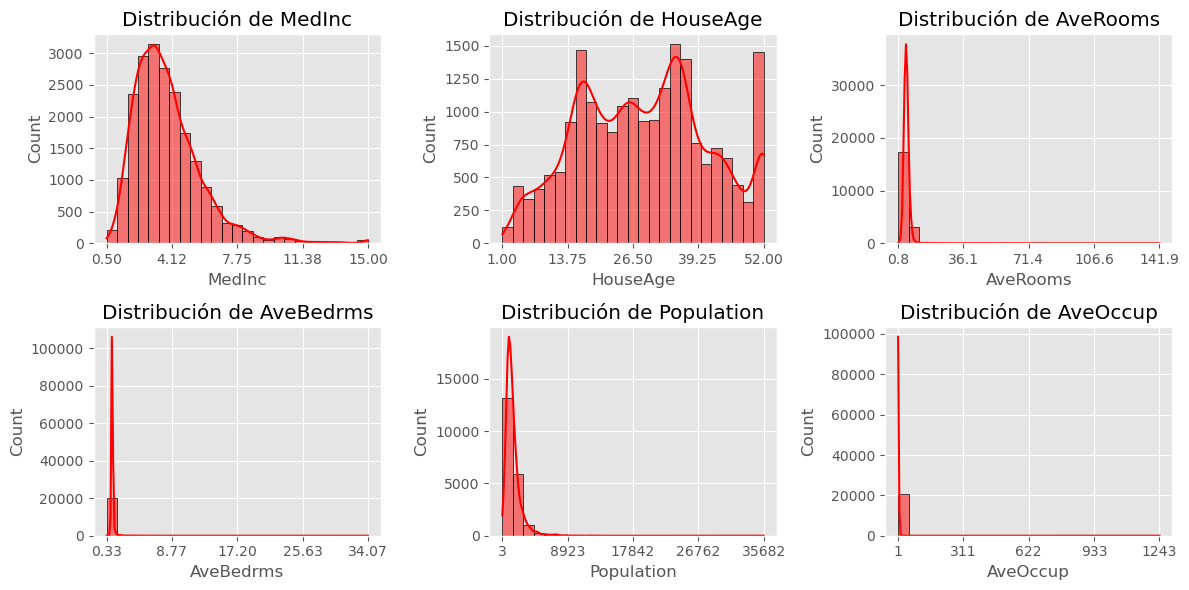

In [8]:
# Distribución de las columnas
cols = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup"]

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    sns.histplot(data=df, x=col, color="red", edgecolor="black", bins=25, ax=ax, kde=True)
    ax.set_title(f"Distribución de {col}")
    ticks = np.linspace(df[col].min(), df[col].max(), num=5)
    ax.set_xticks(ticks)
    
plt.tight_layout()

plt.show()

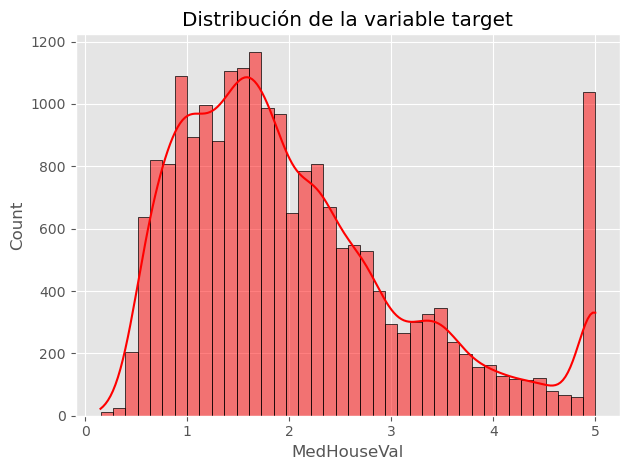

In [9]:
# Distribución de la variable target
sns.histplot(data=df, x="MedHouseVal", color="red", edgecolor="black", bins=40, kde=True)

plt.title("Distribución de la variable target")

plt.tight_layout()

plt.show()

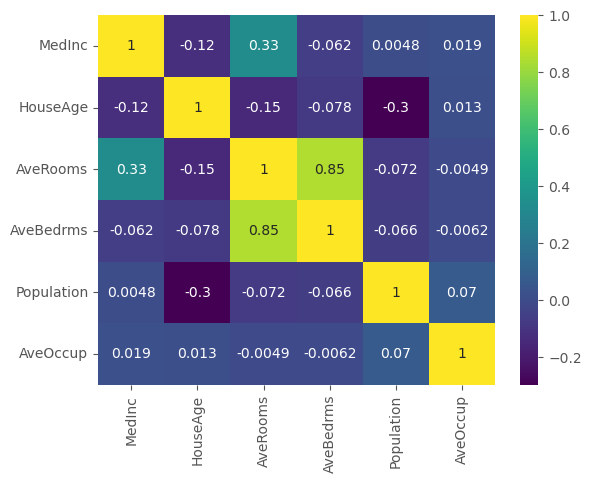

In [10]:
# Correlación de las variables
correlacion = df[cols].corr()

sns.heatmap(correlacion, cmap="viridis", annot=True)

plt.show()

In [11]:
# Dividir en caracteristicas y objetivo
X = df.drop("MedHouseVal", axis=1)

y = df["MedHouseVal"]

In [12]:
# Dividimos en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# Estructura datos entrenamiento
estructura_datos(X_train)

Cantidad de filas: 16512
Cantidad de columnas: 8
Cantidad de datos: 132096
Cantidad de valores duplicados: 0
Cantidad de valores nulos: 0
Columnas: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


In [14]:
# Estructura datos de prueba
estructura_datos(X_test)

Cantidad de filas: 4128
Cantidad de columnas: 8
Cantidad de datos: 33024
Cantidad de valores duplicados: 0
Cantidad de valores nulos: 0
Columnas: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


In [15]:
# Instanciar el estandarizador
scaler = StandardScaler()

# Nombres de las columnas
nombres = X_train.columns

# Estandarizamos los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=nombres)

# Estandarizamos los datos de prueba
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=nombres)

In [16]:
X_train_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.190012,-1.795076,0.907714,0.149243,-1.047601,0.074082,-0.840062,1.003899
1,0.269311,1.855539,-0.042002,0.009186,0.052109,0.045276,0.985364,-1.434772
2,0.029895,-0.207852,-0.302824,-0.102099,-0.352955,-0.039332,-0.840062,0.779481
3,-1.264470,0.744482,-0.812064,-0.176636,-0.591794,0.093990,-0.755812,0.649818
4,-0.367016,1.855539,-0.520269,-0.107804,-0.254095,-0.164572,-0.723048,0.599947
...,...,...,...,...,...,...,...,...
16507,0.281216,-0.684019,0.224858,-0.103189,-0.624165,0.034252,1.238115,-0.846300
16508,-0.504949,-0.128491,-0.033022,-0.333310,-0.681031,0.010119,0.868349,-0.661778
16509,-0.355897,0.188954,-0.709927,-0.316025,-0.631164,-0.192383,0.447097,-1.165471
16510,0.920532,0.427037,-0.353503,-0.065518,-0.326709,-0.121509,-0.938355,0.814390


In [17]:
X_test_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.144489,-0.525297,0.091334,-0.042292,0.109851,0.178551,-1.425135,1.253252
1,0.998204,0.268315,0.267352,-0.344087,-0.113241,-0.001481,-0.797937,0.794442
2,0.247755,0.030231,0.197399,-0.142911,0.112475,-0.018693,1.415977,-1.135549
3,-0.747459,0.665121,-0.174233,0.450910,-0.905872,-0.044098,-1.134939,1.976375
4,0.591906,-0.287213,-0.441219,-0.115618,-0.679281,-0.204640,1.013447,-1.429785
...,...,...,...,...,...,...,...,...
4123,-0.731410,0.347676,-0.616994,-0.125619,0.546410,-0.010571,-0.685603,0.714649
4124,0.266216,0.585760,-0.059037,-0.233612,-0.540177,-0.014335,-0.643478,0.555064
4125,-0.353275,-1.398270,-0.062034,-0.077408,-0.503433,-0.065696,1.514269,-0.676740
4126,1.189107,-0.842742,0.749373,-0.092688,-0.309212,-0.025494,1.093017,-1.190406


In [18]:
# Almacenar los diferentes modelos y sus métricas
modelos = []

# Instanciamos el modelo de regresión lineal
regresion_lineal = LinearRegression()

# Entrenamos el modelo
regresion_lineal.fit(X_train_scaled, y_train)

# Predicciones del modelo
y_pred_lr = regresion_lineal.predict(X_test_scaled)

# Métricas del modelo
mae_rl = mean_absolute_error(y_test, y_pred_lr)

mse_rl = mean_squared_error(y_test, y_pred_lr)

r2_rl = r2_score(y_test, y_pred_lr)

# Agregamos el modelo y sus resultados
modelos.append({
    "Modelo": "Regresión Lineal",
    "MAE": mae_rl,
    "MSE": mse_rl,
    "R2": r2_rl
})

In [19]:
# Instanciamos el modelo de árboles de decisión
arbol_decision = DecisionTreeRegressor(criterion="absolute_error", max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=0)

# Entrenamos el modelo
arbol_decision.fit(X_train_scaled, y_train)

# Predicciones del modelo
y_pred_ad = arbol_decision.predict(X_test_scaled)

# Métricas del modelo
mae_ad = mean_absolute_error(y_test, y_pred_ad)

mse_ad = mean_squared_error(y_test, y_pred_ad)

r2_ad = r2_score(y_test, y_pred_ad)

# Agregamos el modelo y sus resultados
modelos.append({
    "Modelo": "Árbol de Decisión",
    "MAE": mae_ad,
    "MSE": mse_ad,
    "R2": r2_ad
})

In [20]:
# Instanciamos el modelo de random forest
random_forest = RandomForestRegressor(n_estimators=200, max_depth=None, criterion="absolute_error", random_state=0)

# Entrenamos el modelo
random_forest.fit(X_train_scaled, y_train)

# Predicciones del modelo
y_pred_rf = random_forest.predict(X_test_scaled)

# Métricas del modelo
mae_rf = mean_absolute_error(y_test, y_pred_rf)

mse_rf = mean_squared_error(y_test, y_pred_rf)

r2_rf = r2_score(y_test, y_pred_rf)

# Agregamos el modelo y sus resultados
modelos.append({
    "Modelo": "Random Forest",
    "MAE": mae_rf,
    "MSE": mse_rf,
    "R2": r2_rf
})

In [21]:
# Instanciamos el modelo de XGBoost
xgbr = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, subsample=0.8, random_state=0)

# Entrenamos el modelo
xgbr.fit(X_train_scaled, y_train)

# Predicciones del modelo
y_pred_xgbr = xgbr.predict(X_test_scaled)

# Métricas del modelo
mae_xgbr = mean_absolute_error(y_test, y_pred_xgbr)

mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)

r2_xgbr = r2_score(y_test, y_pred_xgbr)

# Agregamos el modelo y sus resultados
modelos.append({
    "Modelo": "XGBRegressor",
    "MAE": mae_xgbr,
    "MSE": mse_xgbr,
    "R2": r2_xgbr
})

In [22]:
# Instanciamos el modelo de support vector machines
svm = SVR()

# Entrenamos el modelo
svm.fit(X_train_scaled, y_train)

# Predicciones del modelo
y_pred_svm = svm.predict(X_test_scaled)

# Métricas del modelo
mae_svm = mean_absolute_error(y_test, y_pred_svm)

mse_svm = mean_squared_error(y_test, y_pred_svm)

r2_svm = r2_score(y_test, y_pred_svm)

# Agregamos el modelo y sus resultados
modelos.append({
    "Modelo": "Support Vector Machines",
    "MAE": mae_svm,
    "MSE": mse_svm,
    "R2": r2_svm
})

In [23]:
# Instanciamos la red neuronal
neural_network = MLPRegressor(hidden_layer_sizes=(100,), random_state=0)

# Entrenamos el modelo
neural_network.fit(X_train_scaled, y_train)

# Predicciones del modelo
y_pred_nn = neural_network.predict(X_test_scaled)

# Métricas del modelo
mae_nn = mean_absolute_error(y_test, y_pred_nn)

mse_nn = mean_squared_error(y_test, y_pred_nn)

r2_nn = r2_score(y_test, y_pred_nn)

# Agregamos el modelo y sus resultados
modelos.append({
    "Modelo": "Redes Neuronales",
    "MAE": mae_nn,
    "MSE": mse_nn,
    "R2": r2_nn
})

In [24]:
# Analizamos los resultados
modelos = pd.DataFrame(modelos)
modelos.sort_values(by="MAE", inplace=True)

modelos

,Modelo,MAE,MSE,R2
2,Random Forest,0.332041,0.252672,0.806227
3,XGBRegressor,0.345870,0.254125,0.805112
5,Redes Neuronales,0.362205,0.306445,0.764988
4,Support Vector Machines,0.385567,0.330914,0.746222
1,Árbol de Decisión,0.528556,0.552754,0.576094
0,Regresión Lineal,0.535126,0.528984,0.594323


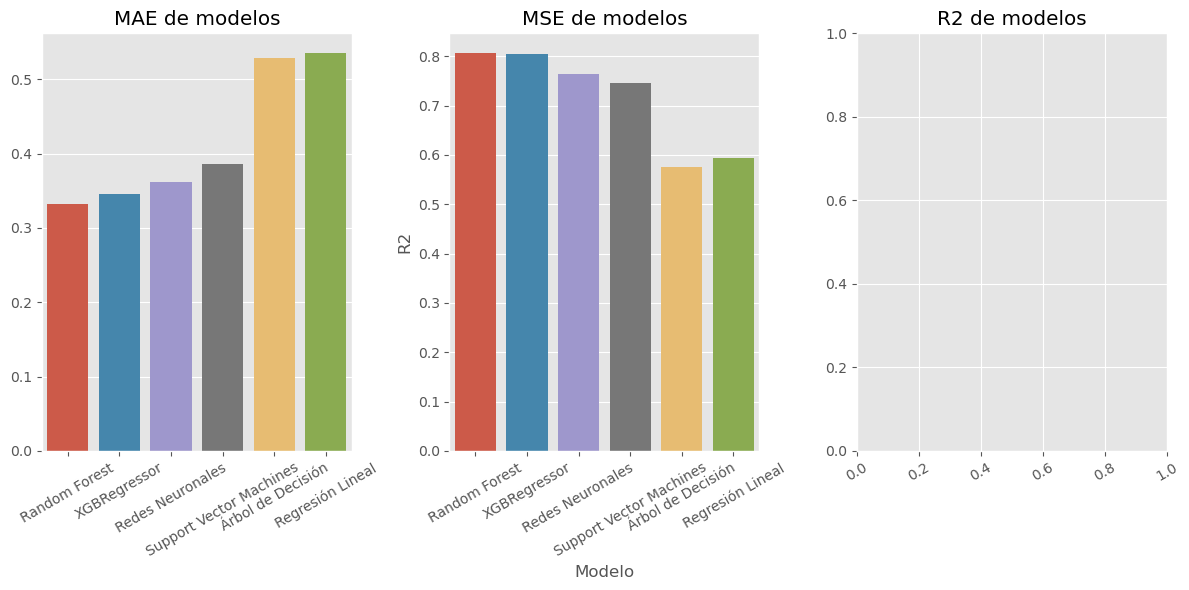

In [25]:
# Gráfico de modelos
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
sns.barplot(modelos, x="Modelo", y="MAE", hue="Modelo", ax=ax[0])
ax[0].set_title("MAE de modelos")
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].tick_params(axis="x", rotation=30)
sns.barplot(modelos, x="Modelo", y="MSE", hue="Modelo", ax=ax[1])
ax[1].set_title("MSE de modelos")
ax[1].set_xlabel("")
ax[1].set_ylabel("")
ax[1].tick_params(axis="x", rotation=30)
sns.barplot(modelos, x="Modelo", y="R2", hue="Modelo", ax=ax[1])
ax[2].set_title("R2 de modelos")
ax[2].set_xlabel("")
ax[2].set_ylabel("")
ax[2].tick_params(axis="x", rotation=30)

plt.tight_layout()

plt.show()

In [26]:
# Optimizar el modelo XGBoost

k_folds = KFold(n_splits=5, shuffle=True, random_state=0)

param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "subsample": [0.7, 0.8, 1.0]
}

xgb_busqueda = RandomizedSearchCV(
    xgbr,
    param_grid,
    n_iter=20,
    cv=k_folds,
    scoring="neg_mean_absolute_error"
)

xgb_busqueda.fit(X_train_scaled, y_train)

print(xgb_busqueda.best_params_)
print(-xgb_busqueda.best_score_)

{'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1}
0.3011253944335681


In [27]:
# Optimizar la red neuronal

param_grid = {
    "hidden_layer_sizes": [(50,), (100,), (50, 50)],
    "activation": ["relu", "tanh"],
    "solver": ["adam", "sgd"],
    "learning_rate_init": [0.001, 0.01, 0.1]
}

red_neuronal = MLPRegressor(max_iter=500, random_state=0)

rn_busqueda = RandomizedSearchCV(
    red_neuronal,
    param_grid,
    n_iter=20,
    cv=k_folds,
    scoring="neg_mean_absolute_error"
)

rn_busqueda.fit(X_train_scaled, y_train)

print(rn_busqueda.best_params_)
print(-rn_busqueda.best_score_)

{'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (50, 50), 'activation': 'tanh'}
0.3473192728848935


In [28]:
# Optimizar el árbol de decisión

param_grid = {
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

ad_busqueda = RandomizedSearchCV(
    arbol_decision,
    param_grid,
    n_iter=20,
    cv=k_folds,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=2
)

ad_busqueda.fit(X_train_scaled, y_train)

print(ad_busqueda.best_params_)
print(-ad_busqueda.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}
0.4189019061319913


In [29]:
# Resultados de optimización
resultados = {
    "XGBoost": -xgb_busqueda.best_score_,
    "Red Neuronal": -rn_busqueda.best_score_,
    "Árbol de Decisión": -ad_busqueda.best_score_,
}

print("Resultados de los modelos:")
for model, mae in resultados.items():
    print(f"{model}: MAE = {mae}")

Resultados de los modelos:
XGBoost: MAE = 0.3011253944335681
Red Neuronal: MAE = 0.3473192728848935
Árbol de Decisión: MAE = 0.4189019061319913


In [30]:
# Elegir el mejor modelo
mejor_modelo = min(resultados, key=resultados.get)

print(f"El mejor modelo es: {mejor_modelo}")

El mejor modelo es: XGBoost


In [31]:
# Obtener el mejor estimador
if mejor_modelo == "XGBoost":
    mejor_estimador = xgb_busqueda.best_estimator_
elif mejor_modelo == "Red Neuronal":
    mejor_estimador = rn_busqueda.best_estimator_
else:
    mejor_estimador = ad_busqueda.best_estimator_

In [32]:
test_mae = mean_absolute_error(y_test, mejor_estimador.predict(X_test_scaled))

print(f"MAE en el conjunto de prueba del mejor modelo ({mejor_modelo}): {test_mae}")

MAE en el conjunto de prueba del mejor modelo (XGBoost): 0.28907432114968235


In [33]:
# Resultados del mejor modelo
final_pred = mejor_estimador.predict(X_test_scaled)

valores = pd.DataFrame({
    "Predicted Values": final_pred,
    "Actual Values": y_test,
    "Difference": y_test - final_pred
})

valores.head()

,Predicted Values,Actual Values,Difference
14740,1.364589,1.369,0.004411
10101,2.517802,2.413,-0.104802
20566,1.437077,2.007,0.569923
2670,0.588156,0.725,0.136844
15709,4.497069,4.600,0.102931


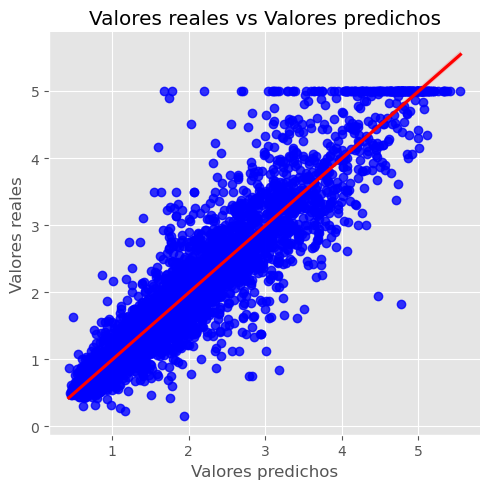

In [40]:
# Visualización de la regresión
sns.lmplot(data=valores, x="Predicted Values", y="Actual Values", scatter_kws={"color":"blue"}, line_kws={"color":"red"})

plt.title("Valores reales vs Valores predichos")
plt.xlabel("Valores predichos")
plt.ylabel("Valores reales")

plt.tight_layout()

plt.show()